# Ingest Data

In [2]:
import os
import numpy as np
import pandas as pd
import dask.dataframe as dd

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# set this to true to read from Open DataHub
USE_ODH = False

In [4]:
# location of dataset csv on datahub s3
BUCKET = "" # insert
PREFIX = "" # insert
FILENAME = "" # insert
ENDPOINT_URL = "" # insert
s3_path = "s3://" + os.path.join(BUCKET, PREFIX, FILENAME)
s3_path

's3://'

**NOTE** If reading data from Open DataHub, make sure that access id and secret key are stored as one of the following ways:

1. Inside `~/.aws/credentials` or `~/.aws/config` or `/etc/boto.cfg` or `~/.boto` as `aws_access_key_id=foobar` and `aws_secret_access_key=verysecret`
2. Environment variables `AWS_ACCESS_KEY_ID=foobar` and `AWS_SECRET_ACCESS_KEY=verysecret`
3. (NOT RECOMMENDED) Plain text string arguments in `storage_options` dict of `dask.dataframe.read_csv`

In [0]:
# read in from s3
if USE_ODH:
  df = dd.read_csv(
      s3_path,
      header=None,
      storage_options={
          "client_kwargs": {"endpoint_url": ENDPOINT_URL}
      }
  )
  # data is small enough to be fit in memory
  df = df.compute()
  
  df_trial = dd.read_csv(
      s3_path,
      header=None,
      storage_options={
          "client_kwargs": {"endpoint_url": ENDPOINT_URL}
      }
  )
  # data is small enough to be fit in memory
  df_trial = df_trial.compute()
else:
  df = pd.read_csv('gdrive/My Drive/allDogs.csv', header=None)
  df_trial = pd.read_csv('gdrive/My Drive/trialDogs.csv', header=None)
  
# prettify df
df = df.transpose()
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header

# read in trial csv
df_trial = df_trial.transpose()
new_header = df_trial.iloc[0] 
df_trial = df_trial[1:] 
df_trial.columns = new_header

In [6]:
df.head(25)

,Dog,Mass,Calories,Fat,Cholesterol,Sodium,Potassium,Carbohydrates,Protein,Time,Temp
1,Smart Dogs Veggie Hot Dogs,42,50,2,0,0.33,0.16,2,7,100,156.6
2,Smart Dogs Veggie Hot Dogs,42,50,2,0,0.33,0.16,2,7,100,163
3,Smart Dogs Veggie Hot Dogs,42,50,2,0,0.33,0.16,2,7,90,155.4
4,Smart Dogs Veggie Hot Dogs,42,50,2,0,0.33,0.16,2,7,80,140.5
5,Smart Dogs Veggie Hot Dogs,42,50,2,0,0.33,0.16,2,7,60,115.2
6,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,100,166.1
7,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,100,164.2
8,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,90,158.9
9,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,80,149.2
10,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,60,128.6


In [0]:
#Optimal Hotdog Temperature
#Simple regression Approach

from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
model_names = ['Ball Park', 'Oscar Mayer', 'Hebrew National', 'Veggie Dog']
models = []
IDEAL_TEMP = 193

In [8]:
#Trial 1
#Linear Regression with Ball Park Franks

ballpark_df = df.loc[df['Dog'] == "Ball Park Franks"]
ballpark_X = ballpark_df['Time'].values.reshape(-1,1)
ballpark_y = ballpark_df['Temp'].values

ballpark_model = LinearRegression()
ballpark_model.fit(ballpark_X, ballpark_y)
models.append(ballpark_model)
ballpark_df.head()


,Dog,Mass,Calories,Fat,Cholesterol,Sodium,Potassium,Carbohydrates,Protein,Time,Temp
6,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,100,166.1
7,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,100,164.2
8,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,90,158.9
9,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,80,149.2
10,Ball Park Franks,53,130,11,0.045,0.48,0,2,5,60,128.6


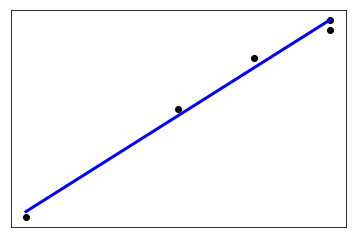

In [9]:
pred = ballpark_model.predict(ballpark_X)

ballpark_X = list(map(float, ballpark_X))
ballpark_y = list(map(float, ballpark_y))

plt.scatter(ballpark_X, ballpark_y,  color='black')
plt.plot(ballpark_X, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
#Trial 2
#Linear Regression with Oscar Mayer

oscar_df = df.loc[df['Dog'] == "Oscar Mayer"]
oscar_X = oscar_df['Time'].values.reshape(-1,1)
oscar_y = oscar_df['Temp'].values

oscar_model = LinearRegression()
oscar_model.fit(oscar_X, oscar_y)
models.append(oscar_model)

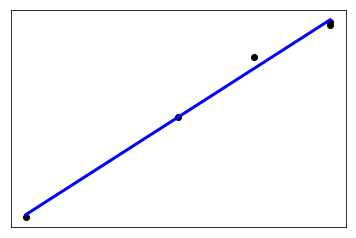

In [11]:
pred = oscar_model.predict(oscar_X)

oscar_X = list(map(float, oscar_X))
oscar_y = list(map(float, oscar_y))

plt.scatter(oscar_X, oscar_y,  color='black')
plt.plot(oscar_X, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
#Trial 3
#Linear Regression with Hebrew National

hebrew_df = df.loc[df['Dog'] == "Hebrew National"]
hebrew_X = hebrew_df['Time'].values.reshape(-1,1)
hebrew_y = hebrew_df['Temp'].values

hebrew_model = LinearRegression()
hebrew_model.fit(hebrew_X, hebrew_y)
models.append(hebrew_model)

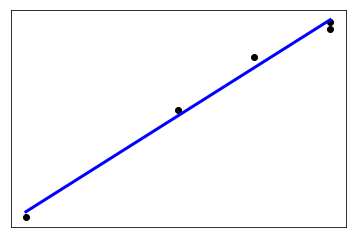

In [13]:
pred = hebrew_model.predict(hebrew_X)

hebrew_X = list(map(float, hebrew_X))
hebrew_y = list(map(float, hebrew_y))

plt.scatter(hebrew_X, hebrew_y,  color='black')
plt.plot(hebrew_X, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
#Trial 4
#Linear Regression with Veggie Dog

veggie_df = df.loc[df['Dog'] == "Smart Dogs Veggie Hot Dogs"]
veggie_X = veggie_df['Time'].values.reshape(-1,1)
veggie_y = veggie_df['Temp'].values

veggie_model = LinearRegression()
veggie_model.fit(veggie_X,veggie_y)
models.append(veggie_model)

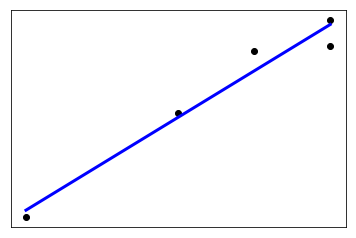

In [15]:
pred = veggie_model.predict(veggie_X)

veggie_X = list(map(float, veggie_X))
veggie_y = list(map(float, veggie_y))

plt.scatter(veggie_X, veggie_y,  color='black')
plt.plot(veggie_X, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
for model, name in zip(models, model_names):
    cook_time = (IDEAL_TEMP - model.intercept_)/model.coef_
    print(f'Ideal cook time for {name} is {cook_time}')

Ideal cook time for Ball Park is [129.43976494]
Ideal cook time for Oscar Mayer is [121.29485179]
Ideal cook time for Hebrew National is [128.11873554]
Ideal cook time for Veggie Dog is [127.72618858]


In [0]:
#Multvariate Approach
